
**GOAL OF THIS NOTEBOOK**  
1. Explore inherent feature selection methods given by Random Forest.  
2. Determine semi-arbitrary cutoff of % important, reduce using those features  
3. Begin introductory model fitting, with goal of minimizing MSE as compared to $R^2$.  


In [2]:
import os
from zipfile import ZipFile

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
os.chdir("/Users/anhthyngo/ds-ga1001-master/")

In [4]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')) + '/data/'
listings = datadir + 'airbnb_clean.csv.zip'
print(listings)

/Users/anhthyngo/ds-ga1001-master/data/airbnb_clean.csv.zip


In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
zf = ZipFile(listings) 
data = pd.read_csv(zf.open("airbnb_clean.csv"), low_memory=False)
#data.drop('zipcode', axis = 1, inplace=True)
data.head(5)


,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,extra_people,cleaning_fee,security_deposit,price,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,host_verifications_ facebook,host_verifications_ google,host_verifications_ government_id,host_verifications_ identity_manual,host_verifications_ jumio,host_verifications_ kba,host_verifications_ manual_offline,host_verifications_ manual_online,host_verifications_ offline_government_id,host_verifications_ phone,host_verifications_ reviews,host_verifications_ selfie,host_verifications_ sent_id,host_verifications_ sesame,host_verifications_ sesame_offline,host_verifications_ weibo,host_verifications_ work_email,host_verifications_ zhima_selfie,host_verifications_email,host_verifications_facebook,host_verifications_google,host_verifications_jumio,host_verifications_offline_government_id,host_verifications_phone,host_verifications_reviews,amenities_ toilet,amenities_24-hour check-in,amenities_Accessible-height bed,amenities_Accessible-height toilet,amenities_Air conditioning,amenities_Air purifier,amenities_BBQ grill,amenities_Baby bath,amenities_Baby monitor,amenities_Babysitter recommendations,amenities_Bathtub,amenities_Bathtub with bath chair,amenities_Beach essentials,amenities_Beachfront,amenities_Bed linens,amenities_Breakfast,amenities_Building staff,amenities_Buzzer/wireless intercom,amenities_Cable TV,amenities_Carbon monoxide detector,amenities_Cat(s),amenities_Ceiling hoist,amenities_Changing table,amenities_Children’s books and toys,amenities_Children’s dinnerware,amenities_Cleaning before checkout,amenities_Coffee maker,amenities_Cooking basics,amenities_Crib,amenities_Disabled parking spot,amenities_Dishes and silverware,amenities_Dishwasher,amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_EV charger,amenities_Electric profiling bed,amenities_Elevator,amenities_Essentials,amenities_Ethernet connection,amenities_Extra pillows and blankets,amenities_Extra space around bed,amenities_Family/kid friendly,amenities_Fire extinguisher,amenities_Fireplace guards,amenities_Firm mattress,amenities_First aid kit,amenities_Fixed grab bars for shower,amenities_Fixed grab bars for toilet,amenities_Flat path to guest entrance,amenities_Free parking on premises,amenities_Free street parking,amenities_Full kitchen,amenities_Game console,amenities_Garden or backyard,amenities_Ground floor access,amenities_Gym,amenities_Hair dryer,amenities_Handheld shower head,amenities_Hangers,amenities_Heating,amenities_High chair,amenities_Host greets you,amenities_Hot tub,amenities_Hot water,amenities_Hot water kettle,amenities_Indoor fireplace,amenities_Internet,amenities_Iron,amenities_Keypad,amenities_Kitchen,amenities_Kitchenette,amenities_Lake access,amenities_Laptop friendly workspace,amenities_Lock on bedroom door,amenities_Lockbox,amenities_Long term stays allowed,amenities_Luggage dropoff allowed,amenities_Microwave,amenities_Mobile hoist,amenities_No stairs or steps to enter,amenities_Other,amenities_Other pet(s),amenities_Outlet covers,amenities_Oven,amenities_Pack ’n Play/travel crib,amenities_Paid parking off premises,amenities_Paid par

In [13]:
columns = data.columns


data_no = []

for col in columns:
    if data[col].nunique() != 2:
        data_no.append([col,data[col].quantile(0.02),data[col].quantile(0.98)])
    else:
        data_no.append([col,data[col].min(),data[col].max()])
df = pd.DataFrame(data_no, columns = ['column','5','95']) 
df.head()

,column,5,95
0,host_response_rate,0.330000,1.000000
1,host_listings_count,0.000000,168.000000
2,host_total_listings_count,0.000000,168.000000
3,latitude,40.619620,40.851691
4,longitude,-74.011288,-73.806639


In [14]:
for index, row in df.iterrows():
   
    data = data[(data[df['column'][index]]>= df['5'][index]) & (data[df['column'][index]] <= df['95'][index])]
    print(data.shape)


(31291, 259)
(30351, 259)
(30351, 259)
(28884, 259)
(27720, 259)
(27164, 259)
(26667, 259)
(26484, 259)
(26355, 259)
(26008, 259)
(25523, 259)
(25276, 259)
(25276, 259)
(25188, 259)
(25169, 259)
(25169, 259)
(25169, 259)
(25169, 259)
(25169, 259)
(25169, 259)
(25169, 259)
(24812, 259)
(24003, 259)
(23497, 259)
(20265, 259)
(20211, 259)
(20183, 259)
(20087, 259)
(20022, 259)
(19921, 259)
(19878, 259)
(19823, 259)
(19745, 259)
(19402, 259)
(19057, 259)
(18778, 259)
(18373, 259)
(16337, 259)
(13582, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)
(13372, 259)

In [16]:
X = data.drop('price',axis=1)
Y = np.log(data.pop('price'))

In [17]:
print(X.shape)
print(X)

(13372, 258)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
nan_cols = [i for i in X.columns if X[i].isnull().any()]
nan_cols

[]

In [31]:
'''
Some columns have NANs. To move forward with feature selection, these will be imputed. 
When we get to the pipeline implementation, we can be more careful about this. 
For now, as in line with the rest of our analysis, we'll impute with median. 

We will separately impute our training and testing split (block below)
'''

"\nSome columns have NANs. To move forward with feature selection, these will be imputed. \nWhen we get to the pipeline implementation, we can be more careful about this. \nFor now, as in line with the rest of our analysis, we'll impute with median. \n\nWe will separately impute our training and testing split (block below)\n"

In [19]:
'''
PART 1 -- INHERENT FEATURE SELECTION OF RANDOM FOREST
Essentially here we're just creating some notion of how a Regression RF does in terms of mean accuracy with or without 
certain features.
While it's worth nothing there is zero model optimization going on here, there's still information to be gained. 
'''
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=.2,random_state=42)

In [20]:
for col in nan_cols:
    Xtrain[col].fillna(Xtrain[col].median(),inplace=True)
    Xtest[col].fillna(Xtest[col].median(),inplace=True)



In [21]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
model = regr.fit(Xtrain,Ytrain)

/Users/anhthyngo/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)

In [ ]:
total = 0 
reduced_features = []
for i in range(len(sorted_indices)):
    feature , importance = list(X.columns)[sorted_indices[-i]], feature_importances[sorted_indices[-i]]
    if(importance > .005):
        reduced_features.append(feature)
        total+=importance
        print(feature,importance)
print("-------------------------------------------------------------------------")
print(len(feature_importances[feature_importances>=.005]),"variables account for",round(total*100,2),"% of the feature importance.")
print("\n")
print("Can account for",round(total*100,2),"% of the feature importance deemed by the model with",round((len(feature_importances[feature_importances>=.005])/X.shape[1])*100,2),"% \n of the original number of features")
print("-------------------------------------------------------------------------")

In [39]:
'''
CONCLUSION
29 variables account for 92% of feature importance seems to be a good tradeoff between
complexity and feature relevance. We can move forward from here
'''

'\nCONCLUSION\n29 variables account for 92% of feature importance seems to be a good tradeoff between\ncomplexity and feature relevance. We can move forward from here\n'

In [40]:
'''
PART 2a-- CREATING REDUCED DATASET
'''

'\nPART 2a-- CREATING REDUCED DATASET\n'

In [33]:
'''
Re-reading in data so we don't have any carryover from modifications in step1
'''

#data = pd.read_csv(zf.open("airbnb_no_impute_20191202.csv"), low_memory=False)
#reduced_features.append('price')
data =  data[[c for c in data.columns if c in reduced_features]]
data['price'] = Y
data.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month,extra_people,cleaning_fee,security_deposit,neighbourhood_group_cleansed_Manhattan,room_type_Private room,price
5,40.72764,-73.97949,2,1.0,1.0,2,30,30,30,30.0,12,42,72,347,94,0,95.0,0.73,15.0,75.0,500.0,1,0,116.0
7,40.80316,-73.96545,2,1.0,1.0,1,5,5,5,5.0,1,1,1,40,54,12,93.0,0.43,0.0,75.0,450.0,1,0,135.0
9,40.66829,-73.98779,2,1.0,1.0,1,4,4,4,4.0,6,29,59,332,171,14,94.0,1.35,22.0,67.0,200.0,0,1,89.0
10,40.79826,-73.96113,1,1.0,1.0,1,2,2,2,2.0,3,24,54,329,116,25,92.0,0.92,40.0,80.0,200.0,1,1,85.0
14,40.67592,-73.94694,4,1.0,1.0,3,3,3,3,3.0,0,8,34,34,62,53,96.0,4.39,50.0,70.0,500.0,0,0,99.0


(array([2567., 2766., 2623., 1712., 1114.,  931.,  579.,  236.,  301.,
         134.,   59.,   97.,   72.,   12.,   67.]),
 array([ 34. ,  66.4,  98.8, 131.2, 163.6, 196. , 228.4, 260.8, 293.2,
        325.6, 358. , 390.4, 422.8, 455.2, 487.6, 520. ]),
 <a list of 15 Patch objects>)

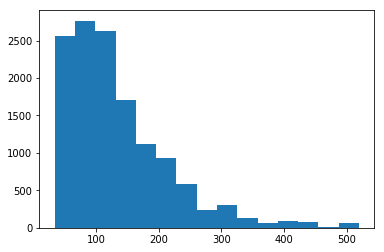

In [34]:
plt.hist(data['price'],bins=15)

In [46]:
data.shape

(13049, 24)

In [35]:
'''
If you want to read this csv onto your local system and run some models locally, just run this 
block with a specified path.

NOTE: outside of feature reduction, there are no differences between this and the original dataset. 
the 5 columns will still have NANs, there is no train-test splitting going on, etc. 
'''

data.to_csv(os.getcwd()+'/data/airbnb_feature_selection.csv.gz', index=False, compression='gzip')

In [ ]:
'''
PART 2b -- MODELING

Now we can start with some modeling to see what can produce the lowest MSE. 
OPTIONS FOR MODELING: 
Linear Regression - OLS (cross validate)
Linear Regression - Lasso (cross validate, parameter grid search)
Linear Regression - Ridge (cross validate, parameter grid search)
Random Forest - (hyperparameter grid search)
XGBoost - (hyperparameter grid search)
'''

In [45]:
data.head()

,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month,extra_people,cleaning_fee,security_deposit,room_type_Private room,price
5,10009,40.72764,-73.97949,2,1.0,1.0,2,30,30,30,30.0,12,42,72,347,94,0,95.0,0.73,15.0,75.0,500.0,0,116.0
7,10025,40.80316,-73.96545,2,1.0,1.0,1,5,5,5,5.0,1,1,1,40,54,12,93.0,0.43,0.0,75.0,450.0,0,135.0
9,11215,40.66829,-73.98779,2,1.0,1.0,1,4,4,4,4.0,6,29,59,332,171,14,94.0,1.35,22.0,67.0,200.0,1,89.0
10,10025,40.79826,-73.96113,1,1.0,1.0,1,2,2,2,2.0,3,24,54,329,116,25,92.0,0.92,40.0,80.0,200.0,1,85.0
14,11216,40.67592,-73.94694,4,1.0,1.0,3,3,3,3,3.0,0,8,34,34,62,53,96.0,4.39,50.0,70.0,500.0,0,99.0
